<a href="https://colab.research.google.com/github/wallisonferreira/data-science-tce/blob/main/aula9_ex1_ST_to_ML_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat

series = read_csv('https://gitlab.com/jdallyson/seriestemporais/-/raw/main/datasets/AirPassengers.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)

temps = DataFrame(series.values)

dataframe = concat([temps.shift(2), temps.shift(1), temps], axis=1)
dataframe.columns = ['t-2', 't-1', 't']

print(dataframe.head(10))


<ipython-input-1-dc38a9e1a472>:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('https://gitlab.com/jdallyson/seriestemporais/-/raw/main/datasets/AirPassengers.csv', header=0, index_col=0,


     t-2    t-1    t
0    NaN    NaN  112
1    NaN  112.0  118
2  112.0  118.0  132
3  118.0  132.0  129
4  132.0  129.0  121
5  129.0  121.0  135
6  121.0  135.0  148
7  135.0  148.0  148
8  148.0  148.0  136
9  148.0  136.0  119


Visualizando a Série temporal

<ipython-input-3-89941cc2bbaa>:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  serie = read_csv('https://gitlab.com/jdallyson/seriestemporais/-/raw/main/datasets/AirPassengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


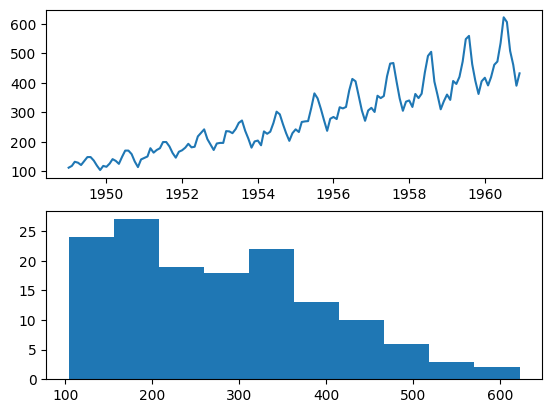

In [3]:
from pandas import read_csv
from matplotlib import pyplot

serie = read_csv('https://gitlab.com/jdallyson/seriestemporais/-/raw/main/datasets/AirPassengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
pyplot.figure(1)

# Gráfico de linha
pyplot.subplot(211)
pyplot.plot(serie)

# Histograma
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

Criando função ml_to_st

Criando uma função denominada ml_to_st (). Esta função divide uma determinada sequência univariada em várias amostras em que cada amostra tem um certo Número de etapas de tempo e a saída é uma única etapa de tempo.

In [4]:
from numpy import array

# Divide uma ST univariada em amostras
def ml_to_st(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    # Encontra o fim do padrão
    end_ix = i + n_steps
    # Verifique se estamos além da sequência
    if end_ix > len(sequence)-1:
        break
    # junta partes de entrada e saída do padrão
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

Testando a função ml_to_st


In [5]:
serie = read_csv('https://gitlab.com/jdallyson/seriestemporais/-/raw/main/datasets/AirPassengers.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)

X, y = ml_to_st(serie, 3)
print(X)


<ipython-input-5-a30e5df2dc07>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  serie = read_csv('https://gitlab.com/jdallyson/seriestemporais/-/raw/main/datasets/AirPassengers.csv', header=0, index_col=0,


[[112 118 132]
 [118 132 129]
 [132 129 121]
 [129 121 135]
 [121 135 148]
 [135 148 148]
 [148 148 136]
 [148 136 119]
 [136 119 104]
 [119 104 118]
 [104 118 115]
 [118 115 126]
 [115 126 141]
 [126 141 135]
 [141 135 125]
 [135 125 149]
 [125 149 170]
 [149 170 170]
 [170 170 158]
 [170 158 133]
 [158 133 114]
 [133 114 140]
 [114 140 145]
 [140 145 150]
 [145 150 178]
 [150 178 163]
 [178 163 172]
 [163 172 178]
 [172 178 199]
 [178 199 199]
 [199 199 184]
 [199 184 162]
 [184 162 146]
 [162 146 166]
 [146 166 171]
 [166 171 180]
 [171 180 193]
 [180 193 181]
 [193 181 183]
 [181 183 218]
 [183 218 230]
 [218 230 242]
 [230 242 209]
 [242 209 191]
 [209 191 172]
 [191 172 194]
 [172 194 196]
 [194 196 196]
 [196 196 236]
 [196 236 235]
 [236 235 229]
 [235 229 243]
 [229 243 264]
 [243 264 272]
 [264 272 237]
 [272 237 211]
 [237 211 180]
 [211 180 201]
 [180 201 204]
 [201 204 188]
 [204 188 235]
 [188 235 227]
 [235 227 234]
 [227 234 264]
 [234 264 302]
 [264 302 293]
 [302 293 